In [1]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt

import seaborn as sns
from base_file import CreateVideo

#constructing the video writer

Createvideo = CreateVideo(fps=80)


/home/inder/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
colors = ["b",
"g",
"r",
"c",
"m",
"y",
"k"]

# The setup of the experiment is like this.

1. There are two players, one X and the other Y
2. Each takes turn to flip a fair coin.
3. Before flipping this coin, each one bets one dollar(only because it sounds cool) on the outcome.
4. If heads comes X wins all the money (1 dollar of Y and takes back his own dollar as well), similarly if tails comes Y takes all the money.
5. The game will go on until X wins 100 dollars or loose 100 dollars

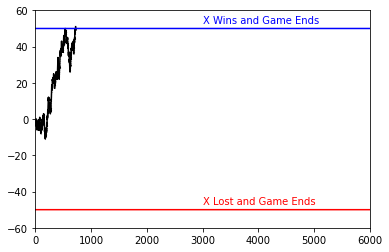

In [3]:
x_win = 0
all_counts=[]

plt,l,fig,writer = Createvideo.create_base(markersize=0.1,color = colors[0])

with writer.saving(fig,f"rough_videos/test_100.mp4",100):
    for i in range(7):
        l.set_color(colors[i])

        class store:
            ttl_amnt_X_won = 0
            ttl_amnt_Y_won = 0
            num_wins_X = 0
            num_wins_Y = 0
            X_win_list = []

        #here 0 is heads and 1 is tails
        heads_or_tails = [0,1]

        def one_iteration(heads_or_tails = heads_or_tails,store = store):

            current_outcome = choice(heads_or_tails)

            #meaning X won and its a heads
        #     print(store.ttl_amnt_X_won)
            if current_outcome:
                store.ttl_amnt_X_won += 1
                store.ttl_amnt_Y_won -= 1
                store.num_wins_X += 1

            else:
                store.ttl_amnt_Y_won += 1
                store.ttl_amnt_X_won -= 1
                store.num_wins_Y += 1

            store.X_win_list.append(store.ttl_amnt_X_won)

            return

        count = 0
        while not (store.ttl_amnt_X_won >50 or store.ttl_amnt_X_won <-50):
            count+=1
            one_iteration()
    #             plt.xlim(-5,count)
            #setting the upper limit
            l.set_data(list(range(count)),store.X_win_list)
            writer.grab_frame()
    #         if :
    #             break

        if store.ttl_amnt_X_won >= 50:
            x_win+=1
            all_counts.append(count)